# Week:8 Assignment - Time Series Modeling

Author: Venkat Jagadeesh Jampani

Date: 02/02/2023

You will be using the dataset us_retail_sales.csv for this assignment. This data gives the total monthly retail sales in the US from January 1992 until June 2021. With this dataset, complete the following steps:

In [1]:
## Importing libraries required for this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from datetime import datetime

In [2]:
## Display all columns in pandas dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Load US retail sales dataset.

In [3]:
## Load the data into a dataframe
usrs_df = pd.read_csv('us_retail_sales.csv') 
usrs_df.head(5)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [4]:
## Printing number of rows and columns of the loaded dataframe
usrs_df.shape

(30, 13)

In [5]:
## Printing the dtype for each of the attribute of the data set
usrs_df.dtypes

YEAR      int64
JAN       int64
FEB       int64
MAR       int64
APR       int64
MAY       int64
JUN       int64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [6]:
## Looking at summary information about your data (total, mean, min, max, freq, unique, etc.)
usrs_df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,29.000000,29.000000,29.000000,29.00000,29.000000,29.000000
mean,2006.500000,304803.833333,305200.900000,307533.566667,306719.600000,309205.633333,311406.966667,304375.448276,305451.965517,306078.206897,307310.62069,307794.896552,308099.620690
std,8.803408,97687.399232,96682.043053,100002.422696,98207.161171,99541.010078,101057.212178,92471.103673,92504.808195,93008.417392,92836.64419,92702.551770,91784.061634
min,1992.000000,146925.000000,147223.000000,146805.000000,148032.000000,149010.000000,149800.000000,150761.000000,151067.000000,152588.000000,153521.00000,153583.000000,155614.000000
25%,1999.250000,228856.750000,231470.750000,233019.000000,233235.500000,234976.500000,235967.250000,233948.000000,236566.000000,237481.000000,237553.00000,240544.000000,245485.000000
50%,2006.500000,303486.000000,304592.500000,308655.500000,311233.500000,308690.000000,312957.000000,313520.000000,310046.000000,310673.000000,310479.00000,306675.000000,308413.000000
75%,2013.750000,371527.000000,377008.500000,379221.000000,376797.500000,382698.250000,383839.750000,373554.000000,372489.000000,372505.000000,373663.00000,373914.000000,377032.000000
max,2021.000000,520162.000000,504458.000000,559871.000000,562269.000000,548987.000000,550782.000000,481627.000000,483716.000000,493327.000000,493991.00000,488652.000000,484782.000000


#### Perform Exploratory Data Analysis

In [7]:
# Use melt to convert from wide to long format
usrs_df2 = pd.melt(usrs_df, id_vars='YEAR', value_vars=['JAN', 'FEB', 'MAR', 
                                              'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

In [8]:
## Printing the dtype for each of the attribute of the modified data set: urs_df2
usrs_df2.dtypes

YEAR          int64
variable     object
value       float64
dtype: object

In [9]:
# Convert Year to string
usrs_df2['YEAR'] = usrs_df2['YEAR'].astype(str)

In [10]:
## Printing the dtype for each of the attribute of the modified data set: urs_df2
usrs_df2.dtypes

YEAR         object
variable     object
value       float64
dtype: object

In [11]:
# Build a new column for date
usrs_df2['Date'] = usrs_df2['variable'] + '-01-' + usrs_df2['YEAR']

# Convert Date to Datetime
usrs_df2['Date'] = pd.to_datetime(usrs_df2['Date'])

In [12]:
## Looking at summary information about your data (total, mean, min, max, freq, unique, etc.)
usrs_df2.describe()

,value
count,354.000000
mean,307006.573446
std,94335.828235
min,146805.000000
25%,231402.000000
50%,309534.500000
75%,378193.750000
max,562269.000000


In [13]:
# Drop NA
usrs_df2.dropna(inplace=True)

In [14]:
# Sort by date
usrs_df2 = usrs_df2.sort_values(by=['Date'])

In [15]:
# print the latest modified data set.
usrs_df2.head(5)

,YEAR,variable,value,Date
0,1992,JAN,146925.0,1992-01-01
30,1992,FEB,147223.0,1992-02-01
60,1992,MAR,146805.0,1992-03-01
90,1992,APR,148032.0,1992-04-01
120,1992,MAY,149010.0,1992-05-01


#### 1. Plot the data with proper labeling and make some observations on the graph.

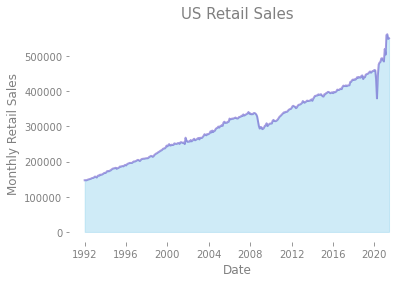

In [17]:
# Create an area chart
plt.fill_between(usrs_df2['Date'], usrs_df2['value'], color="skyblue", alpha=0.4)
plt.plot(usrs_df2['Date'], usrs_df2['value'], color="Slateblue", alpha=0.6, linewidth=2)
plt.box(False)
plt.title('US Retail Sales', loc='center', fontsize=15, color='grey')
plt.xlabel('Date', fontsize=12, color='grey')
plt.ylabel('Monthly Retail Sales', fontsize=12, color='grey')
plt.tick_params(axis='x', colors='grey')
plt.tick_params(axis='y', colors='grey')
plt.show()

#### Observation

US Retail sales have been consistently increasing from 1992. And you can see in the chart, a small decrease in retail sales were seen during 1. The housing crisis (2008-2009) and 2. At the beginning of the pandemic (2020).

#### 2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [18]:
# Build a new feature from date to be used as a predictor (using ordinal time)
usrs_df2['O-Date'] = pd.to_datetime(usrs_df2['Date'])
usrs_df2['O-Date'] = usrs_df2['O-Date'].map(datetime.toordinal)

In [19]:
# Build a new predictor for month
months = dict(JAN=1, FEB=2, MAR=3, APR=4, MAY=5, JUN=6, JUL=7, AUG=8, SEP=9, OCT=10, NOV=11, DEC=12)
usrs_df2['Month'] = usrs_df2['variable'].map(months)

In [20]:
## Spliting based on row value training 0 to 341 and test from : 342 till 354
training = usrs_df2.iloc[0:341]
test = usrs_df2.iloc[342:354]

In [21]:
# Split out x & y reshape date fields
x_train = training[['O-Date', 'Month']]
y_train = training['value']
x_test = test[['O-Date', 'Month']]
y_test = test['value']

#### 3. Use the training set to build a predictive model for the monthly retail sales.

In [22]:
# Create a model(Linear regeression model)
model = LinearRegression()

# Fit the model to the training set
model.fit(x_train, y_train)

LinearRegression()

#### 4. Use the model to predict the monthly retail sales on the last year of data.

In [23]:
# Predict the last years retail sales
test_predictions = model.predict(x_test)

#### 5. Report the RMSE of the model predictions on the test set.

In [24]:
print('Test RMSE:', metrics.mean_squared_error(y_test, test_predictions, squared=False))

Test RMSE: 66817.27313121158


A big spike in the retail sales was seen during the period of time, the model is attempting to predict. This is likely creating the increased RMSE.